## Modeling

### Importing required libraries

In [70]:
#import libraries
import pandas as pd
import statsmodels.tools.tools as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')
import imblearn.over_sampling as im
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,f1_score
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
#Importing dataset
df=pd.read_csv('model_data.csv')
df.head(5)

,grade,emp_length,loan_status,term_ 60 months,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,...,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,fico_average
0,2,11,0,0,0,0,0,1,0,1,...,-0.378891,-0.788860,-0.710327,2.148332,0.053150,-1.473694,-0.063984,1.225422,-1.160265,0.569261
1,3,1,1,1,0,0,0,1,1,0,...,0.863229,-1.284881,-0.616901,-1.849256,2.542837,-1.473694,-0.675041,-1.395933,-1.603223,0.709417
2,3,11,0,0,0,0,0,1,0,0,...,1.048740,-1.166941,-0.893256,-0.691230,0.883045,-1.708273,-0.610211,1.747576,-1.071673,0.569261
3,3,11,0,0,0,0,0,1,1,0,...,0.384663,0.060498,-0.317936,1.000807,0.053150,0.168359,-0.475238,-0.986677,1.320301,-0.692145
4,2,2,0,1,0,0,0,1,1,0,...,0.169578,-1.246563,0.161653,0.691800,-0.776746,1.341254,0.658138,0.174057,1.408893,-0.551989


In [72]:
# Are there any missing values ?
df.isnull().sum().sort_values(ascending=False)

fico_average                           0
purpose_educational                    0
purpose_wedding                        0
purpose_vacation                       0
purpose_small_business                 0
purpose_renewable_energy               0
purpose_other                          0
purpose_moving                         0
purpose_medical                        0
purpose_major_purchase                 0
purpose_house                          0
purpose_home_improvement               0
purpose_debt_consolidation             0
total_acc                              0
purpose_credit_card                    0
verification_status_Verified           0
verification_status_Source Verified    0
home_ownership_RENT                    0
home_ownership_OWN                     0
home_ownership_OTHER                   0
home_ownership_NONE                    0
term_ 60 months                        0
loan_status                            0
emp_length                             0
delinq_2yrs_1   

In [73]:
#summary of data
df.describe()

,grade,emp_length,loan_status,term_ 60 months,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,...,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,fico_average
count,38708.000000,38708.000000,38708.000000,38708.000000,38708.000000,38708.000000,38708.000000,38708.000000,38708.000000,38708.000000,...,3.870800e+04,3.870800e+04,3.870800e+04,3.870800e+04,3.870800e+04,3.870800e+04,3.870800e+04,3.870800e+04,3.870800e+04,3.870800e+04
mean,2.589723,5.974346,0.140539,0.269221,0.000078,0.002532,0.073499,0.478118,0.253668,0.320011,...,5.902802e-15,-5.769801e-16,-2.972431e-16,1.122757e-17,3.620679e-15,2.739246e-16,7.079005e-17,-1.469712e-15,-2.640947e-15,4.290025e-16
std,1.390201,3.562961,0.347550,0.443561,0.008803,0.050254,0.260957,0.499527,0.435116,0.466487,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.785013e+00,-1.497365e+00,-1.021749e+00,-1.999259e+00,-7.767463e-01,-1.708273e+00,-7.612257e-01,-1.727572e+00,-1.780407e+00,-2.514176e+00
25%,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.364705e-01,-7.619989e-01,-4.378955e-01,-7.677319e-01,-7.767463e-01,-7.699571e-01,-5.698136e-01,-8.243862e-01,-7.173068e-01,-8.323015e-01
50%,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.357353e-02,-2.097042e-01,-1.497682e-01,1.378524e-02,5.314952e-02,-6.622003e-02,-3.039926e-01,1.882218e-02,-1.857568e-01,-1.315205e-01
75%,3.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,6.804062e-01,5.199333e-01,2.114809e-01,7.893022e-01,5.314952e-02,6.375171e-01,1.153463e-01,8.302779e-01,6.115681e-01,7.094168e-01
max,7.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.368977e+00,2.914446e+00,9.234246e+01,2.499340e+00,2.542837e+00,2.983307e+00,3.495042e+00,1.796969e+00,3.003543e+00,3.092072e+00


In [74]:
#Determining the shape of the dataset
df.shape

(38708, 50)

In [75]:
#Datatypes of the datafeature
df.dtypes

grade                                    int64
emp_length                               int64
loan_status                              int64
term_ 60 months                          int64
home_ownership_NONE                      int64
home_ownership_OTHER                     int64
home_ownership_OWN                       int64
home_ownership_RENT                      int64
verification_status_Source Verified      int64
verification_status_Verified             int64
purpose_credit_card                      int64
purpose_debt_consolidation               int64
purpose_educational                      int64
purpose_home_improvement                 int64
purpose_house                            int64
purpose_major_purchase                   int64
purpose_medical                          int64
purpose_moving                           int64
purpose_other                            int64
purpose_renewable_energy                 int64
purpose_small_business                   int64
purpose_vacat

### Model preparation

In [76]:
X=df.drop(['loan_status'],axis=1)
y=df['loan_status']

In [77]:
#Checking x shape
X.shape

(38708, 49)

In [78]:
#Checking y shape
y.shape

(38708,)

### Decision Tree

In [79]:
dt =DecisionTreeClassifier(criterion='entropy',random_state=12,max_depth=14)
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=12)

In [80]:
#getting feature importance
col=[]
fi=[]
for i,column in enumerate(X):
    col.append(column)
    fi.append(dt.feature_importances_[i])
data=pd.DataFrame({'columns':col,'fi':fi})
data=data.sort_values('fi',ascending=False).reset_index()
data

,index,columns,fi
0,39,int_rate,0.169074
1,41,annual_inc,0.099173
2,46,revol_util,0.096116
3,42,dti,0.090069
4,45,revol_bal,0.082426
5,40,installment,0.074043
6,47,total_acc,0.069386
7,44,open_acc,0.043685
8,48,fico_average,0.043645
9,1,emp_length,0.037167


In [81]:
#feteching columns with importance
imp=data['columns'][0:34]

In [82]:
X.shape

(38708, 49)

In [83]:
X[imp].shape

(38708, 34)

In [84]:
#taking only the columns that are important
X=X[imp]
X.shape

(38708, 34)

### Checking for multicollinearity using vif

In [85]:
vif=pd.DataFrame()
vif['columns']=X.columns
vif['vif']=[variance_inflation_factor(X.values,i )for i in range (X.shape[1])]
vif.sort_values('vif',ascending=False)

,columns,vif
14,grade,19.474723
10,loan_amnt,16.870994
5,installment,15.193367
0,int_rate,7.479598
16,purpose_debt_consolidation,7.264601
25,pub_rec_1,5.330661
22,pub_rec_bankruptcies_1.0,5.227208
11,term_ 60 months,4.422540
8,fico_average,4.121556
9,emp_length,4.046506


**Inference- Dropping grade and loan amount to remove multicollieanrity**

In [86]:
X=X.drop(['grade','loan_amnt','installment'],1)
X.shape

(38708, 31)

In [87]:
#spliting into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3 ,random_state=10)

In [88]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(27095, 31)
(11613, 31)
(27095,)
(11613,)


## Applying Logistic Regression

In [89]:
#building a logistic regression model

logreg=LogisticRegression(C=75, dual=False,fit_intercept=False, random_state=10, solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=75, fit_intercept=False, random_state=10)

In [90]:
#getting train scores
print('Train results \n')
y_train_predict = logreg.predict(X_train)
model_score = logreg.score(X_train, y_train)
print(model_score)
print("\n")
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

Train results 

0.8523712862151689


[[22984   254]
 [ 3746   111]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     23238
           1       0.30      0.03      0.05      3857

    accuracy                           0.85     27095
   macro avg       0.58      0.51      0.49     27095
weighted avg       0.78      0.85      0.80     27095



In [91]:
#getting test scores
print('\nTest results \n')
y_test_predict = logreg.predict(X_test)
model_score = logreg.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))


Test results 

0.8579178506845776


[[9912  118]
 [1532   51]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92     10030
           1       0.30      0.03      0.06      1583

    accuracy                           0.86     11613
   macro avg       0.58      0.51      0.49     11613
weighted avg       0.79      0.86      0.81     11613



## Naive bayes

In [92]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [93]:
#train
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print("\n")
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.7811404318139878


[[20047  3191]
 [ 2739  1118]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     23238
           1       0.26      0.29      0.27      3857

    accuracy                           0.78     27095
   macro avg       0.57      0.58      0.57     27095
weighted avg       0.79      0.78      0.79     27095



In [94]:
#test
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.7817101524153965


[[8634 1396]
 [1139  444]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     10030
           1       0.24      0.28      0.26      1583

    accuracy                           0.78     11613
   macro avg       0.56      0.57      0.57     11613
weighted avg       0.80      0.78      0.79     11613



## SVM Model

In [95]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1)
SVM_model.fit(X_train, y_train)

SVC(random_state=1)

In [96]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print("\n")
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8576490127329766


[[23238     0]
 [ 3857     0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     23238
           1       0.00      0.00      0.00      3857

    accuracy                           0.86     27095
   macro avg       0.43      0.50      0.46     27095
weighted avg       0.74      0.86      0.79     27095



In [97]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.863687247050719


[[10030     0]
 [ 1583     0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     10030
           1       0.00      0.00      0.00      1583

    accuracy                           0.86     11613
   macro avg       0.43      0.50      0.46     11613
weighted avg       0.75      0.86      0.80     11613



## xgboost in the model

In [98]:
import xgboost as xgb
XGB_SM_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_SM_model.fit(X_train, y_train)

[10:43:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
y_train_predict = XGB_SM_model.predict(X_train)
model_score = XGB_SM_model.score(X_train, y_train)
print(model_score)
print("\n")
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8593836501199483


[[23234     4]
 [ 3806    51]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     23238
           1       0.93      0.01      0.03      3857

    accuracy                           0.86     27095
   macro avg       0.89      0.51      0.48     27095
weighted avg       0.87      0.86      0.80     27095



In [100]:
y_train_predict = XGB_SM_model.predict(X_test)
model_score = XGB_SM_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_train_predict))
print(classification_report(y_test, y_train_predict))

0.8630844742960475


[[10014    16]
 [ 1574     9]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     10030
           1       0.36      0.01      0.01      1583

    accuracy                           0.86     11613
   macro avg       0.61      0.50      0.47     11613
weighted avg       0.80      0.86      0.80     11613



## Applying KNN Classifier

In [101]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train,y_train)

KNeighborsClassifier()

In [102]:
#train
y_train_predict = KNN_SM_model.predict(X_train)
model_score = KNN_SM_model.score(X_train, y_train)
print(model_score)
print("\n")
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8693854954788707


[[22896   342]
 [ 3197   660]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     23238
           1       0.66      0.17      0.27      3857

    accuracy                           0.87     27095
   macro avg       0.77      0.58      0.60     27095
weighted avg       0.85      0.87      0.83     27095



In [103]:
#test
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8468957203134418


[[9745  285]
 [1493   90]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     10030
           1       0.24      0.06      0.09      1583

    accuracy                           0.85     11613
   macro avg       0.55      0.51      0.50     11613
weighted avg       0.78      0.85      0.80     11613



## AdaBooster Classifier

In [104]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [105]:
#train
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print("\n")
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8580549916958848


[[23146    92]
 [ 3754   103]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     23238
           1       0.53      0.03      0.05      3857

    accuracy                           0.86     27095
   macro avg       0.69      0.51      0.49     27095
weighted avg       0.81      0.86      0.80     27095



In [106]:
#test
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.861965039180229


[[9983   47]
 [1556   27]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10030
           1       0.36      0.02      0.03      1583

    accuracy                           0.86     11613
   macro avg       0.62      0.51      0.48     11613
weighted avg       0.80      0.86      0.80     11613



## Random forest

In [107]:
from sklearn.ensemble import RandomForestClassifier


rf_model= RandomForestClassifier(random_state=12,max_depth=14)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, random_state=12)

In [108]:
# Performance on train data set
y_train_predict = rf_model.predict(X_train)
model_score = rf_model.score(X_train, y_train)
print(model_score)
print("\n")
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8870640339546042


[[23238     0]
 [ 3060   797]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     23238
           1       1.00      0.21      0.34      3857

    accuracy                           0.89     27095
   macro avg       0.94      0.60      0.64     27095
weighted avg       0.90      0.89      0.85     27095



In [109]:
#performance on test data
y_test_predict = rf_model.predict(X_test)
model_score = rf_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8636011366571945


[[10026     4]
 [ 1580     3]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     10030
           1       0.43      0.00      0.00      1583

    accuracy                           0.86     11613
   macro avg       0.65      0.50      0.47     11613
weighted avg       0.80      0.86      0.80     11613



# Summary of above models train and test results.

### Inference:From the above results we are taking RandomForest and AdaBoost into furthur tuning.

### Applying smote because of imbalance in the target

In [110]:
smote = im.SMOTE(sampling_strategy='minority',random_state=1)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [111]:
y_train_res.value_counts()

1    23238
0    23238
Name: loan_status, dtype: int64

### Using Grid Search to get best paramets

In [112]:
from sklearn.model_selection import GridSearchCV

### Adaboost Model tuning with smote

### Note - dont run the gridsearch in below cell it takes at least 40 mins to run

In [113]:
# param=[{'learning_rate':[0.3,0.7,1.0,1.4,1.65],'n_estimators':[100,150,200,250,300]}]
# ADB_model = AdaBoostClassifier(random_state=1)
# adb_grid = GridSearchCV(estimator= ADB_model,
#                         param_grid = param,cv=5)
# adb_grid.fit(X_train_res,y_train_res)
# print('Best parameters for Decision Tree Classifier:',tree_grid.best_params_) 

### best parameters - {'learning_rate': 1.65, 'n_estimators': 300}

### Building the new tuned adaboost model

In [114]:
tuned_ADB_model = AdaBoostClassifier(n_estimators=300,learning_rate=1.65,random_state=1)
tuned_ADB_model.fit(X_train_res,y_train_res)

AdaBoostClassifier(learning_rate=1.65, n_estimators=300, random_state=1)

In [115]:
#train
y_train_predict = tuned_ADB_model.predict(X_train_res)
model_score = tuned_ADB_model.score(X_train_res, y_train_res)
print(model_score)
print('---'*20)
print(confusion_matrix(y_train_res, y_train_predict))
print(classification_report(y_train_res, y_train_predict))

0.8885231087012652
------------------------------------------------------------
[[22094  1144]
 [ 4037 19201]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     23238
           1       0.94      0.83      0.88     23238

    accuracy                           0.89     46476
   macro avg       0.89      0.89      0.89     46476
weighted avg       0.89      0.89      0.89     46476



In [116]:
#test
y_test_predict = tuned_ADB_model.predict(X_test)
model_score = tuned_ADB_model.score(X_test, y_test)
print(model_score)
print('---'*20)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.835012486007061
------------------------------------------------------------
[[9506  524]
 [1392  191]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     10030
           1       0.27      0.12      0.17      1583

    accuracy                           0.84     11613
   macro avg       0.57      0.53      0.54     11613
weighted avg       0.79      0.84      0.81     11613



### Adaboost Probabibilty tuning

In [117]:
#train data
y_prob_train= tuned_ADB_model.predict_proba(X_train_res)[:,1]
y_pred_train_new=[]
for i in y_prob_train:
    if i<0.4994:
        y_pred_train_new.append(0)
    else:
        y_pred_train_new.append(1)

In [118]:
#test Data
y_prob_test= tuned_ADB_model.predict_proba(X_test)[:,1]
y_pred_test_new=[]
for i in y_prob_test:
    if i<0.49947:
        y_pred_test_new.append(0)
    else:
        y_pred_test_new.append(1)

In [119]:
#post probabilty tuning train scores
model_score = tuned_ADB_model.score(X_train_res, y_pred_train_new)
print(model_score)
print('---'*20)
print(confusion_matrix(y_train_res, y_pred_train_new))
print(classification_report(y_train_res, y_pred_train_new))

0.8121180824511576
------------------------------------------------------------
[[15548  7690]
 [ 1851 21387]]
              precision    recall  f1-score   support

           0       0.89      0.67      0.77     23238
           1       0.74      0.92      0.82     23238

    accuracy                           0.79     46476
   macro avg       0.81      0.79      0.79     46476
weighted avg       0.81      0.79      0.79     46476



In [120]:
#post probabilty tuning test scores
model_score = tuned_ADB_model.score(X_test, y_pred_test_new)
print(model_score)
print('---'*20)
print(confusion_matrix(y_test, y_pred_test_new))
print(classification_report(y_test, y_pred_test_new))

0.7473521053991217
------------------------------------------------------------
[[7165 2865]
 [ 799  784]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.80     10030
           1       0.21      0.50      0.30      1583

    accuracy                           0.68     11613
   macro avg       0.56      0.60      0.55     11613
weighted avg       0.81      0.68      0.73     11613



# Random Forest model tuning wwith smote

### Note - dont run the gridsearch in below cell it takes at least 40 mins to run

In [121]:
# param=[{'bootstrap': [True,False],
#  'max_leaf_nodes': [5,15,25,40],
#  'n_estimators': [100,150,200]}]
# rf_model= RandomForestClassifier()
# rf_grid = GridSearchCV(estimator= rf_model,
#                          param_grid = param,cv=5)
# rf_grid.fit(X_train_res,y_train_res)
# print('Best parameters for Random Forest:',rf_grid.best_params_)

### best prameters { 'bootstrap': True, 'max_leaf_nodes':40, 'n_estimators':100 }

In [122]:
from sklearn.ensemble import RandomForestClassifier


tuned_rf_model= RandomForestClassifier(bootstrap=True,max_leaf_nodes=40,n_estimators=100,random_state=12)
tuned_rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(max_leaf_nodes=40, random_state=12)

In [123]:
# Performance on train data set
y_train_predict = tuned_rf_model.predict(X_train_res)
model_score = tuned_rf_model.score(X_train_res, y_train_res)
print(model_score)
print('---'*20)
print(confusion_matrix(y_train_res, y_train_predict))
print(classification_report(y_train_res, y_train_predict))

0.746858593682761
------------------------------------------------------------
[[17236  6002]
 [ 5763 17475]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.75     23238
           1       0.74      0.75      0.75     23238

    accuracy                           0.75     46476
   macro avg       0.75      0.75      0.75     46476
weighted avg       0.75      0.75      0.75     46476



In [124]:
# Performance on test data set
y_test_predict = tuned_rf_model.predict(X_test)
model_score = tuned_rf_model.score(X_test, y_test)
print(model_score)
print('---'*20)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.7044691294239215
------------------------------------------------------------
[[7415 2615]
 [ 817  766]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81     10030
           1       0.23      0.48      0.31      1583

    accuracy                           0.70     11613
   macro avg       0.56      0.61      0.56     11613
weighted avg       0.81      0.70      0.74     11613



In [125]:
#train probabilty tuning
y_prob_train= tuned_rf_model.predict_proba(X_train_res)[:,1]
y_pred_train_new=[]
for i in y_prob_train:
    if i<0.45:
        y_pred_train_new.append(0)
    else:
        y_pred_train_new.append(1)

In [126]:
#test probabilty tuning
y_prob_test= tuned_rf_model.predict_proba(X_test)[:,1]
y_pred_test_new=[]
for i in y_prob_test:
    if i<0.45:
        y_pred_test_new.append(0)
    else:
        y_pred_test_new.append(1)

In [127]:
#post probabilty tuning train scores
model_score = tuned_rf_model.score(X_train_res, y_pred_train_new)
print(model_score)
print('---'*20)
print(confusion_matrix(y_train_res, y_pred_train_new))
print(classification_report(y_train_res, y_pred_train_new))

0.8819175488424132
------------------------------------------------------------
[[14077  9161]
 [ 3434 19804]]
              precision    recall  f1-score   support

           0       0.80      0.61      0.69     23238
           1       0.68      0.85      0.76     23238

    accuracy                           0.73     46476
   macro avg       0.74      0.73      0.72     46476
weighted avg       0.74      0.73      0.72     46476



In [128]:
#post porbability tuning test scores
model_score = tuned_rf_model.score(X_test, y_pred_test_new)
print(model_score)
print('---'*40)
print(confusion_matrix(y_test, y_pred_test_new))
print(classification_report(y_test, y_pred_test_new))

0.8575734091104796
------------------------------------------------------------------------------------------------------------------------
[[6016 4014]
 [ 562 1021]]
              precision    recall  f1-score   support

           0       0.91      0.60      0.72     10030
           1       0.20      0.64      0.31      1583

    accuracy                           0.61     11613
   macro avg       0.56      0.62      0.52     11613
weighted avg       0.82      0.61      0.67     11613



**inference - rf forest with SMOTE gives the best result with test and train recall and accuracy**

## Cross Validation

In [129]:
#train data
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(tuned_rf_model, X_train_res, y_pred_train_new, cv=10)
scores_train

array([0.91006885, 0.91415663, 0.90942341, 0.90877797, 0.88403614,
       0.86359725, 0.88035292, 0.8779858 , 0.88056811, 0.91822681])

In [130]:
print("the average train accuracy of the model is :  ",scores_train.mean())

the average train accuracy of the model is :   0.8947193875566825


In [131]:
#test data
scores_test = cross_val_score(tuned_rf_model, X_test, y_pred_test_new, cv=10)
scores_test

array([0.91135972, 0.90533563, 0.91049914, 0.90353144, 0.87855297,
       0.8828596 , 0.89061154, 0.90611542, 0.90439276, 0.91559001])

In [132]:
print("the average test accuracy of the model is :  ",scores_test.mean())

the average test accuracy of the model is :   0.9008848239024759


## Model Prediction

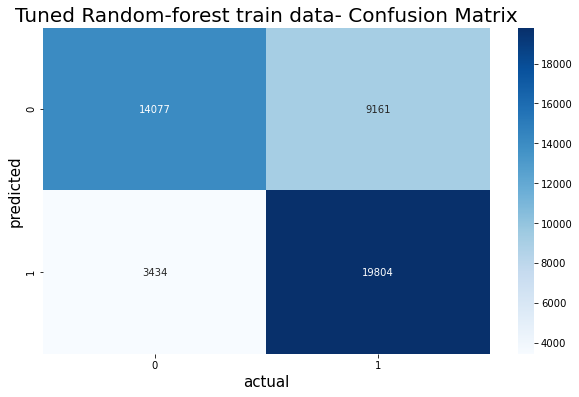

In [133]:
#train data info
cm=confusion_matrix(y_train_res,y_pred_train_new)
plt.figure(figsize=((10,6)))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.0f')
plt.title("Tuned Random-forest train data- Confusion Matrix",fontsize=20)
plt.xlabel("actual",fontsize=15)
plt.ylabel("predicted",fontsize=15)
plt.show()

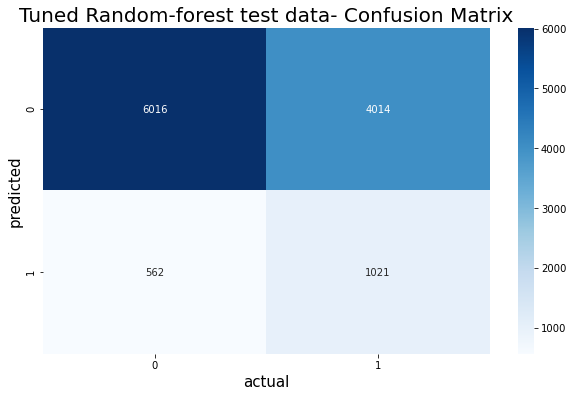

In [134]:
#test data info
cm=confusion_matrix(y_test,y_pred_test_new)
plt.figure(figsize=((10,6)))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.0f')
plt.title("Tuned Random-forest test data- Confusion Matrix",fontsize=20)
plt.xlabel("actual",fontsize=15)
plt.ylabel("predicted",fontsize=15)
plt.show()